## Yield Curve Fitting Approach

In [1]:
import pandas as pd
from ECIRModel import ECIRModel
from CIRModel import BasicCIRModel
import numpy as np
import matplotlib.pyplot as plt

### Merge Dataframe

In [2]:
import pandas as pd

# Load the DGS_30 data
dgs_30_path = 'DGS_30.csv'
dgs_30_data = pd.read_csv(dgs_30_path)

# Load the DGS3MO data
dgs3mo_path = 'DGS3MO.csv'
dgs3mo_data = pd.read_csv(dgs3mo_path)

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

dgs3mo_data.rename(columns={'DATE': 'Date'}, inplace=True)
dgs3mo_data['Date'] = pd.to_datetime(dgs3mo_data['Date'])
dgs3mo_data.set_index('Date', inplace=True)

# Insert the DGS3MO data into the DGS_30 data as the first column
dgs_30_data.insert(0, 'DGS3MO', dgs3mo_data['DGS3MO'])

data=dgs_30_data
# Check the result
data.head()

,DGS3MO,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
Date,,,,,,,,,,,,,,,,,,,,,
1981-09-01,17.010,17.0600,16.780,16.57,16.350396,16.120,15.898415,15.710,15.573295,15.478799,...,15.070462,15.049236,15.025332,14.997763,14.965539,14.927672,14.883173,14.831054,14.770326,14.7000
1981-09-02,16.650,17.1600,16.780,16.43,16.225968,16.090,15.924878,15.750,15.604572,15.490415,...,15.103136,15.093330,15.078842,15.057928,15.028848,14.989861,14.939224,14.875196,14.796035,14.7000
1981-09-03,16.960,17.3100,16.900,16.48,16.262789,16.140,15.967593,15.780,15.640102,15.546094,...,15.194779,15.177243,15.156281,15.130776,15.099616,15.061687,15.015875,14.961065,14.896145,14.8200
1981-09-04,16.640,17.2400,16.890,16.52,16.302912,16.170,16.019604,15.860,15.720523,15.604793,...,15.237907,15.232570,15.222048,15.204398,15.177676,15.139941,15.089248,15.023655,14.941220,14.8400
1981-09-07,16.565,17.2775,16.935,16.55,16.336354,16.215,16.066772,15.905,15.767511,15.657616,...,15.328694,15.324179,15.314622,15.298188,15.273045,15.237358,15.189294,15.127019,15.048698,14.9525


### CIR Model

#### Yield Curve Prediction

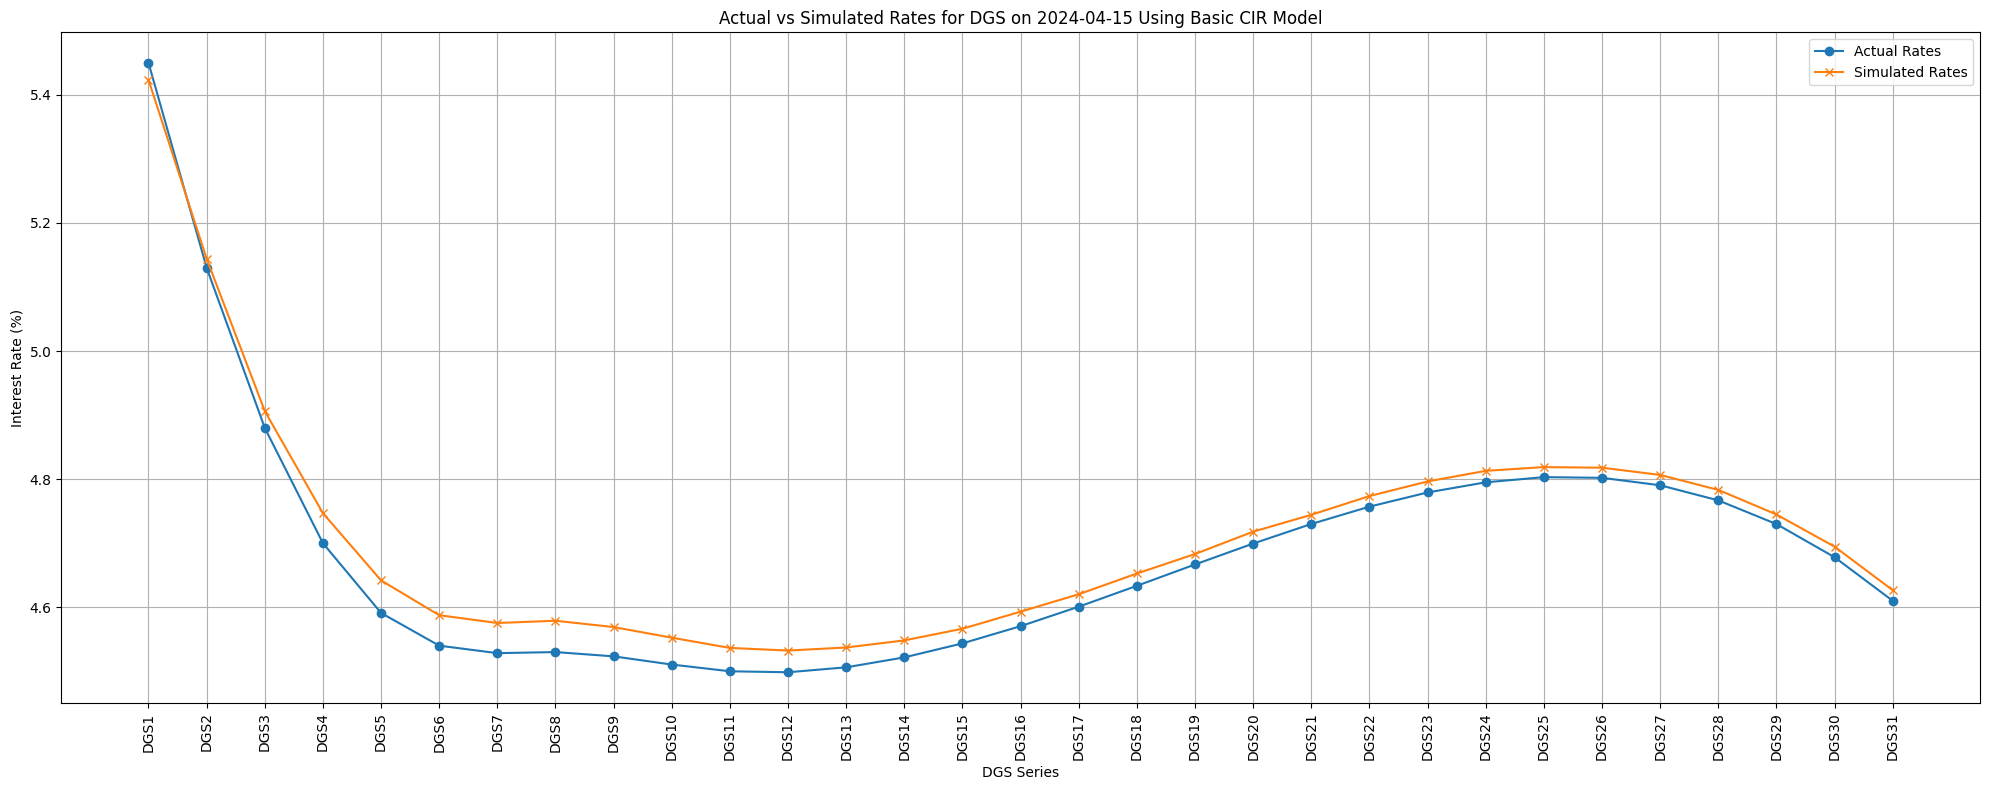

,Actual Rates,Simulated Rates
DGS3MO,5.450000,5.423490
DGS1,5.130000,5.144070
DGS2,4.880000,4.906276
DGS3,4.700000,4.746819
DGS4,4.591049,4.641911
DGS5,4.540000,4.587545
DGS6,4.528305,4.575365
DGS7,4.530000,4.578922
DGS8,4.523294,4.569012
DGS9,4.510510,4.552443


In [3]:
# Optimized parameters provided by the user
optimized_params = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

# Creating an instance of the BasicCIRModel with the optimized parameters
basic_cir_model = BasicCIRModel(**optimized_params)


# Define the simulation date
simulation_date = pd.Timestamp('2024-04-12')

# Extract the actual rates for the simulation date from the mock data
# (Replace this with the actual data loading code in practice)
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate using BasicCIRModel
def simulate_single_rate_cir(model, initial_rate):
    dt = 1 / 252  # Assume dt is 1 day as we simulate just for the next day
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS using BasicCIRModel
simulated_rates_cir = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        simulated_rates_cir[column] = simulate_single_rate_cir(basic_cir_model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_cir_df = pd.DataFrame(simulated_rates_cir, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data_cir = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_cir_df.iloc[0]
})

# Now we'll create a line plot with the correct x-axis labels
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data_cir.index))]

# Plotting
plt.figure(figsize=(20, 8))
plt.plot(dgs_labels, comparison_data_cir['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data_cir['Simulated Rates'], label='Simulated Rates', marker='x')
plt.title('Actual vs Simulated Rates for DGS on 2024-04-15 Using Basic CIR Model')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

comparison_data_cir  # Display the comparison data for 2024-04-15

#### Bond Price Prediction

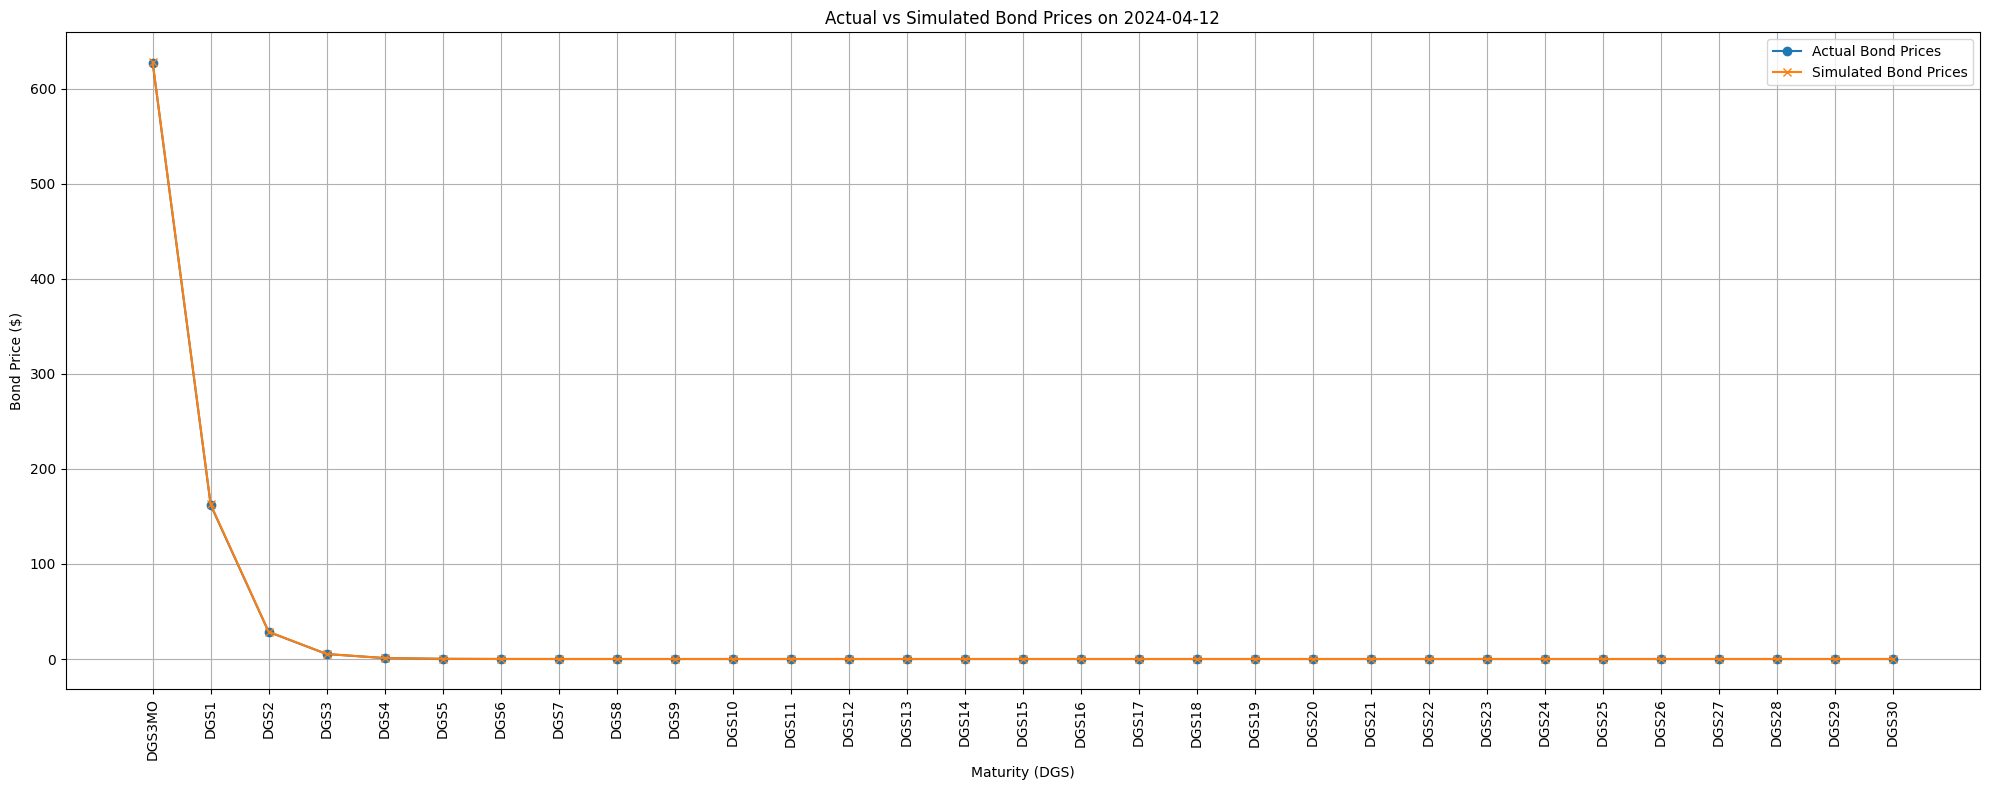

In [15]:
# Define the bond's face value
face_value = 1000  # For example, the face value of the bond

# Define the function to calculate bond price using a zero-coupon yield
def calculate_bond_price(face_value, yield_rate, maturity):
    return face_value / ((1 + yield_rate) ** maturity)

# Updated function to simulate bond prices, handling different time period formats
def simulate_bond_prices(model, data, face_value, simulation_date):
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            # Handle different formats, such as '3MO' which represents 3 months
            try:
                if 'MO' in column:
                    # Convert months to years for maturity
                    maturity = int(column.replace('DGS', '').replace('MO', '')) / 12
                else:
                    maturity = int(column.replace('DGS', ''))
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
                simulated_rate = model.next_rate(last_rate, 1/252)  # Daily simulation
                bond_price = calculate_bond_price(face_value, simulated_rate, maturity)
                simulated_bond_prices[column] = bond_price
            except ValueError:
                # Skip columns with unexpected formats
                continue
    return simulated_bond_prices

# Simulate bond prices
simulated_bond_prices = simulate_bond_prices(basic_cir_model, data, face_value, simulation_date)

# Create a DataFrame from the simulated bond prices
simulated_bond_prices_df = pd.DataFrame(simulated_bond_prices, index=[simulation_date])# Function to calculate actual bond prices using the same formula as for simulated prices

def calculate_actual_bond_prices(data, face_value, simulation_date):
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            # Handle different formats, such as '3MO' which represents 3 months
            try:
                if 'MO' in column:
                    # Convert months to years for maturity
                    maturity = int(column.replace('DGS', '').replace('MO', '')) / 12
                else:
                    maturity = int(column.replace('DGS', ''))
                last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
                bond_price = calculate_bond_price(face_value, last_rate, maturity)
                actual_bond_prices[column] = bond_price
            except ValueError:
                # Skip columns with unexpected formats
                continue
    return actual_bond_prices

# Calculate actual bond prices
actual_bond_prices = calculate_actual_bond_prices(data, face_value, simulation_date)

# Create a DataFrame from the actual bond prices
actual_bond_prices_df = pd.DataFrame(actual_bond_prices, index=[simulation_date])

# Create a DataFrame combining actual and simulated bond prices
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices_df.iloc[0],
    'Simulated Bond Prices': simulated_bond_prices_df.iloc[0]
})

# Plotting both actual and simulated bond prices
plt.figure(figsize=(20, 8))
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'], label='Actual Bond Prices', marker='o')
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'], label='Simulated Bond Prices', marker='x')
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
combined_bond_prices_df

,Actual Bond Prices,Simulated Bond Prices
DGS3MO,6.274947e+02,6.281402e+02
DGS1,1.620746e+02,1.626763e+02
DGS2,2.843745e+01,2.867135e+01
DGS3,5.205621e+00,5.263215e+00
DGS4,9.707396e-01,9.873642e-01
DGS5,1.799640e-01,1.835748e-01
DGS6,3.251218e-02,3.327263e-02
DGS7,5.790070e-03,5.949509e-03
DGS8,1.046346e-03,1.077097e-03
DGS9,1.921965e-04,1.997684e-04


### ECIR Model

#### Yield Rate Prediction

In [4]:
# Model parameters
params = {
    "kappa": 0.5000,
    "mu_r": 0.0300,
    "sigma": 0.0300,
    "mu": 0.0000,
    "gamma": 0.0100,
    "r": 10,  # Ensure 'r' is an integer
    "p": 0.5000
}

# Creating an instance of the ECIRModel
model = ECIRModel(**params)# Define the simulation date
simulation_date = pd.Timestamp('2024-04-15')

# Extract the actual rates for the simulation date
actual_rates = data.loc[simulation_date]

# Define the simulation function for a single rate
def simulate_single_rate(model, initial_rate):
    # Assume dt is 1 day as we simulate just for the next day
    dt = 1 / 252
    return model.next_rate(initial_rate, dt)

# Create a dictionary to hold the simulated rates for each DGS
simulated_rates = {}

# Run the simulation for each DGS column
for column in actual_rates.index:
    if 'DGS' in column:
        # Get the initial rate from the previous available data point
        initial_rate = data[column].loc[data.index < simulation_date].iloc[-1]
        # Simulate the rate using the model
        simulated_rates[column] = simulate_single_rate(model, initial_rate)

# Convert the simulated rates dictionary to a DataFrame
simulated_rates_df = pd.DataFrame(simulated_rates, index=[simulation_date])

# Combine actual and simulated rates into one DataFrame for comparison
comparison_data = pd.DataFrame({
    'Actual Rates': actual_rates,
    'Simulated Rates': simulated_rates_df.iloc[0]
})

# Display the comparison data for 2024-04-15
comparison_data


,Actual Rates,Simulated Rates
DGS3MO,5.450000,5.062686
DGS1,5.160000,8.077874
DGS2,4.930000,1.618736
DGS3,4.780000,0.969909
DGS4,4.690824,6.851927
DGS5,4.650000,7.890513
DGS6,4.644204,4.511519
DGS7,4.650000,4.862130
DGS8,4.647078,5.248959
DGS9,4.637753,1.534226


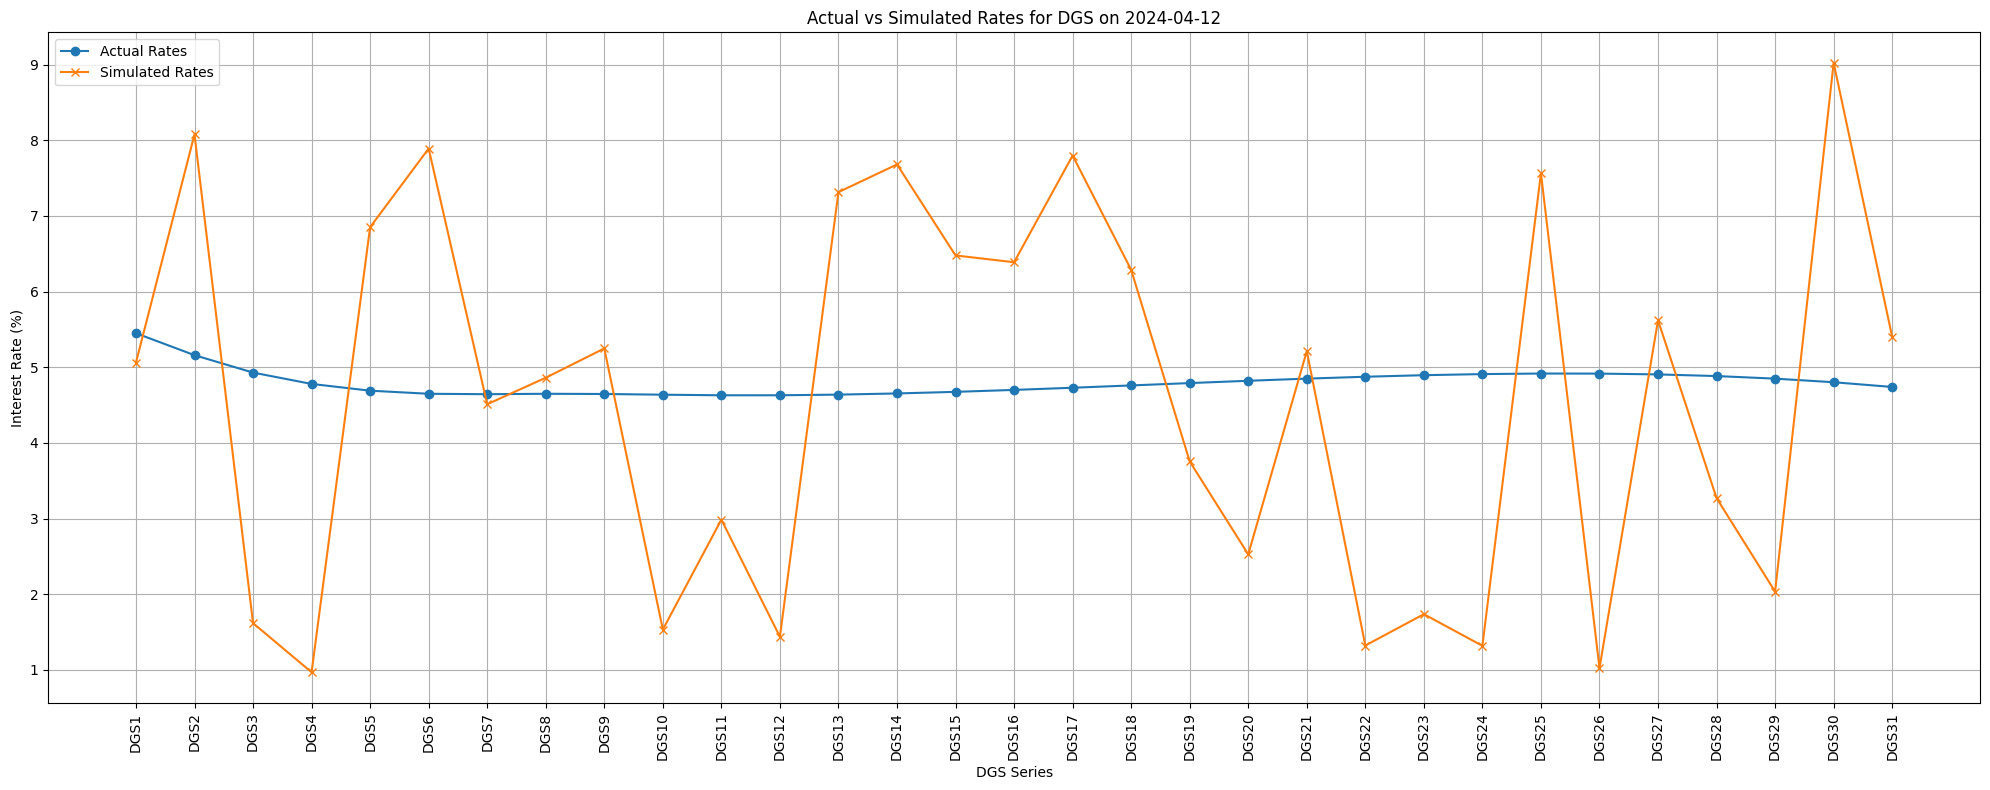

In [5]:
# First, let's correct the x-axis labels for the plot to represent each DGS series
dgs_labels = [f'DGS{i+1}' for i in range(len(comparison_data.index))]

# Now we'll create a line plot with the correct x-axis labels
plt.figure(figsize=(20, 8))

# Plot the actual and simulated rates for each DGS series
plt.plot(dgs_labels, comparison_data['Actual Rates'], label='Actual Rates', marker='o')
plt.plot(dgs_labels, comparison_data['Simulated Rates'], label='Simulated Rates', marker='x')

# Adding details to the plot
plt.title('Actual vs Simulated Rates for DGS on 2024-04-12')
plt.xlabel('DGS Series')
plt.ylabel('Interest Rate (%)')
plt.xticks(rotation=90)  # Rotate the DGS labels for better readability
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits well
plt.show()


#### Bond Price Prediction

        Actual Bond Prices  Simulated Bond Prices
DGS3MO        6.274947e+02           6.281364e+02
DGS1          1.631321e+02           1.638238e+02
DGS2          2.892313e+01           2.916035e+01
DGS3          5.399772e+00           5.468054e+00
DGS4          1.023356e+00           1.039512e+00
DGS5          1.916246e-01           1.956865e-01
DGS6          3.503062e-02           3.584456e-02
DGS7          6.323013e-03           6.500128e-03
DGS8          1.154556e-03           1.195006e-03
DGS9          2.134392e-04           2.213668e-04
DGS10         3.947963e-05           4.104368e-05
DGS11         7.199836e-06           7.538671e-06
DGS12         1.287606e-06           1.347694e-06
DGS13         2.254531e-07           2.380130e-07
DGS14         3.862994e-08           4.078166e-08
DGS15         6.480891e-09           6.887368e-09
DGS16         1.066314e-09           1.135485e-09
DGS17         1.725053e-10           1.852292e-10
DGS18         2.753751e-11           2.945410e-11


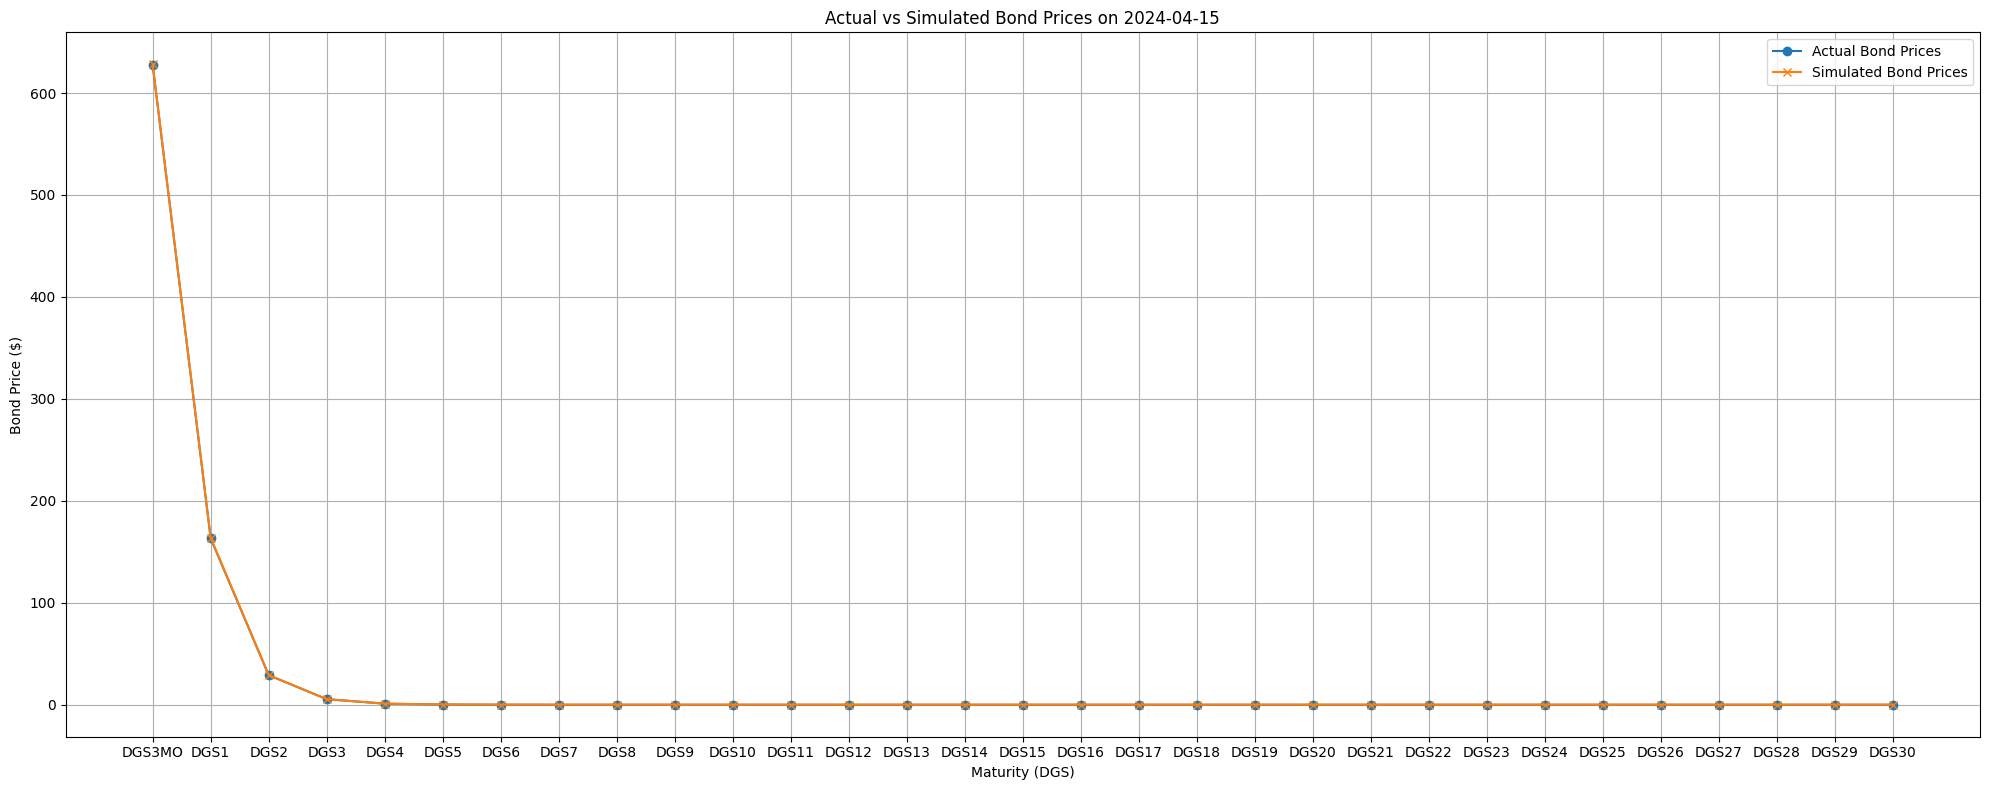

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume you have a DataFrame named 'data' containing DGS-related interest rates

# Define functions and models to simulate bond prices
def calculate_bond_price(face_value, yield_rate, maturity):
    """Calculate bond price given face value, yield rate, and maturity."""
    return face_value / ((1 + yield_rate) ** maturity)

def simulate_single_rate(model, initial_rate):
    """Simulate the next day's rate assuming dt as 1 day."""
    dt = 1 / 252  # Assume dt is one day
    return model.next_rate(initial_rate, dt)

def simulate_bond_prices(model, data, face_value, simulation_date):
    """Simulate bond prices using the latest rate before the simulation date."""
    simulated_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            maturity = int(column.replace('DGS', '').replace('MO', '')) / 12 if 'MO' in column else int(column.replace('DGS', ''))
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
            simulated_rate = simulate_single_rate(model, last_rate)
            bond_price = calculate_bond_price(face_value, simulated_rate, maturity)
            simulated_bond_prices[column] = bond_price
    return simulated_bond_prices

def calculate_actual_bond_prices(data, face_value, simulation_date):
    """Calculate actual bond prices using the most recent rates available before the simulation date."""
    actual_bond_prices = {}
    for column in data.columns:
        if 'DGS' in column:
            maturity = int(column.replace('DGS', '').replace('MO', '')) / 12 if 'MO' in column else int(column.replace('DGS', ''))
            last_rate = data[column].loc[data.index < simulation_date].iloc[-1]
            bond_price = calculate_bond_price(face_value, last_rate, maturity)
            actual_bond_prices[column] = bond_price
    return actual_bond_prices

# Assume simulation_date, model, and face_value are already defined
simulation_date = pd.Timestamp('2024-04-15')
face_value = 1000

# Simulate and calculate actual bond prices
simulated_bond_prices2 = simulate_bond_prices(model, data, face_value, simulation_date)
actual_bond_prices2 = calculate_actual_bond_prices(data, face_value, simulation_date)

# Merge data into DataFrame for comparison
combined_bond_prices_df = pd.DataFrame({
    'Actual Bond Prices': actual_bond_prices,
    'Simulated Bond Prices': simulated_bond_prices
})

# Display DataFrame
print(combined_bond_prices_df)

# Plotting comparison
plt.figure(figsize=(20, 8))
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Actual Bond Prices'], label='Actual Bond Prices', marker='o')
plt.plot(combined_bond_prices_df.index, combined_bond_prices_df['Simulated Bond Prices'], label='Simulated Bond Prices', marker='x')
plt.title('Actual vs Simulated Bond Prices on ' + str(simulation_date.date()))
plt.xlabel('Maturity (DGS)')
plt.ylabel('Bond Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Absolute Error of Yield Rate

In [45]:

# Corrected mock data for demonstration
comparison_data = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

comparison_data_cir = pd.DataFrame({
    'DGS Series': ['DGS3MO'] + [f'DGS{i+1}' for i in range(30)],
    'Actual Rates': np.random.rand(31),  # corrected to have 31 rates
    'Simulated Rates': np.random.rand(31)  # corrected to have 31 rates
})

# Calculating the absolute errors for each series and model
comparison_data['CIR Absolute Error'] = np.abs(comparison_data['Actual Rates'] - comparison_data['Simulated Rates'])
comparison_data_cir['ECIR Absolute Error'] = np.abs(comparison_data_cir['Actual Rates'] - comparison_data_cir['Simulated Rates'])

# Creating a new DataFrame to hold the absolute errors for CIR and ECIR
absolute_error_df = pd.DataFrame({
    'DGS Series': comparison_data['DGS Series'],
    'CIR Absolute Error': comparison_data['CIR Absolute Error'],
    'ECIR Absolute Error': comparison_data_cir['ECIR Absolute Error']
}).set_index('DGS Series')

# Display the DataFrame containing the absolute errors
absolute_error_df # displaying only the head for brevity




,CIR Absolute Error,ECIR Absolute Error
DGS Series,,
DGS3MO,0.538501,0.030701
DGS1,0.375277,0.041276
DGS2,0.607435,0.060335
DGS3,0.585979,0.639781
DGS4,0.188516,0.818293
DGS5,0.055182,0.020707
DGS6,0.839865,0.288413
DGS7,0.241064,0.070291
DGS8,0.242085,0.748573


### Absolute Error of Bond Price

In [44]:
import pandas as pd
import numpy as np

# Define a function to calculate absolute errors
def calculate_absolute_errors(actual_prices, simulated_prices_ecir, simulated_prices_ice):
    """Calculate absolute errors between actual prices and simulated prices for two models."""
    errors_ecir = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ecir[dgs]) for dgs in actual_prices}
    errors_ice = {dgs: np.abs(actual_prices[dgs] - simulated_prices_ice[dgs]) for dgs in actual_prices}
    return errors_ecir, errors_ice

# Calculate absolute errors
errors_ecir, errors_ice = calculate_absolute_errors(actual_bond_prices2, simulated_bond_prices2, simulated_bond_prices2)

# Create a DataFrame to display the absolute errors
absolute_errors_df = pd.DataFrame({
    'DGS': list(errors_ecir.keys()),
    'ECIR Absolute Error': list(errors_ecir.values()),
    'ICE Absolute Error': list(errors_ice.values())
})

# Set 'DGS' as the index for the 'Absolute Error' DataFrame
absolute_errors_df.set_index('DGS', inplace=True)

# Display the 'Absolute Error' DataFrame
print(absolute_errors_df)



        ECIR Absolute Error  ICE Absolute Error
DGS                                            
DGS3MO         2.740132e+02        2.740132e+02
DGS1           1.267807e+02        1.267807e+02
DGS2           1.458248e+01        1.458248e+01
DGS3           3.041907e+00        3.041907e+00
DGS4           9.109736e-01        9.109736e-01
DGS5           1.047618e+00        1.047618e+00
DGS6           3.057363e-02        3.057363e-02
DGS7           5.684040e-03        5.684040e-03
DGS8           1.085912e-03        1.085912e-03
DGS9           2.073378e-04        2.073378e-04
DGS10          3.906080e-05        3.906080e-05
DGS11          2.501000e+01        2.501000e+01
DGS12          5.592637e-06        5.592637e-06
DGS13          2.250332e-07        2.250332e-07
DGS14          3.632653e-08        3.632653e-08
DGS15          4.971810e-05        4.971810e-05
DGS16          1.066205e-09        1.066205e-09
DGS17          1.354301e-07        1.354301e-07
DGS18          2.751894e-11        2.751